In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime

%config InlineBackend.figure_format = 'svg'
%matplotlib inline
sns.set(color_codes=True)
plt.style.use('seaborn-colorblind')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 2)

## PPT visualizations ##

In [76]:
anime_titles[:10]

['Fullmetal Alchemist: Brotherhood',
 'Steins;Gate',
 'Hunter x Hunter (2011)',
 'Ginga Eiyuu Densetsu',
 'Gintama°',
 "Gintama'",
 'Shingeki no Kyojin Season 3 Part 2',
 "Gintama': Enchousen",
 '3-gatsu no Lion 2nd Season',
 'Kimi no Na wa.']

In [2]:
with open(f'../pickles/alesyasabri1_user_embedding_norm.pkl', 'rb') as read_file:
    alesyasabri1_user_embedding_norm = pickle.load(read_file)
    
with open(f'../pickles/mo_dao_zu_shi_anime_embedding_norm.pkl', 'rb') as read_file:
    mo_dao_zu_shi_anime_embedding_norm = pickle.load(read_file)

In [5]:
# Need to arrange this data into a df and then put into seaborn
# Zip through the two arrays and create list of dicts and combine into a df
alesyasabri1_user_embedding_norm.reshape(1, 6)
mo_dao_zu_shi_anime_embedding_norm.reshape(1, 6)

array([[0.29, 0.  , 0.2 , 0.09, 0.04, 0.38]])

array([[0.33, 0.  , 0.24, 0.  , 0.  , 0.43]])

In [23]:
feature_name_dict = {
    0: 'Popularity',
    1: 'Action-packed classic',
    2: 'Supernatural/fantasy',
    3: 'Shounen',
    4: 'Slice-of-life',
    5: 'Animation quality'
} 

In [24]:
embedding_dicts = []
for idx, (user_feature, anime_feature) in \
    enumerate(zip(alesyasabri1_user_embedding_norm, mo_dao_zu_shi_anime_embedding_norm)):
    user_embedding_dict = {
        'type': 'User: alesyasabri1',
        'feature_name': feature_name_dict[idx],
        'feature_value': user_feature
    }
    anime_embedding_dict = {
        'type': 'Anime: Mo Dao Zu Shi',
        'feature_name': feature_name_dict[idx],
        'feature_value': anime_feature
    }
    embedding_dicts = embedding_dicts + [user_embedding_dict] + [anime_embedding_dict]

In [25]:
embedding_comparison_df = pd.DataFrame(embedding_dicts)

In [8]:
np.concatenate((alesyasabri1_user_embedding_norm.reshape(1, 6), 
                mo_dao_zu_shi_anime_embedding_norm.reshape(1, 6)), axis=0)

array([[0.29, 0.  , 0.2 , 0.09, 0.04, 0.38],
       [0.33, 0.  , 0.24, 0.  , 0.  , 0.43]])

In [26]:
embedding_comparison_df

,type,feature_name,feature_value
0,User: alesyasabri1,Popularity,0.29
1,Anime: Mo Dao Zu Shi,Popularity,0.33
2,User: alesyasabri1,Action-packed classic,0.00
3,Anime: Mo Dao Zu Shi,Action-packed classic,0.00
4,User: alesyasabri1,Supernatural/fantasy,0.20
5,Anime: Mo Dao Zu Shi,Supernatural/fantasy,0.24
6,User: alesyasabri1,Shounen,0.09
7,Anime: Mo Dao Zu Shi,Shounen,0.00
8,User: alesyasabri1,Slice-of-life,0.04
9,Anime: Mo Dao Zu Shi,Slice-of-life,0.00


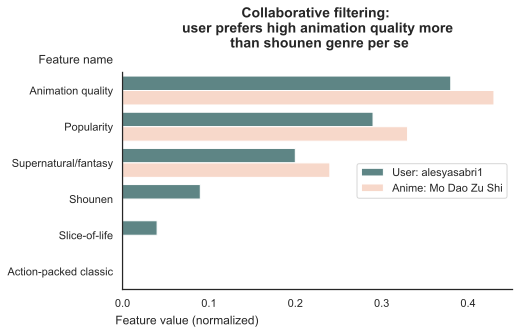

In [70]:
order = ['Animation quality', 'Popularity', 'Supernatural/fantasy',
        'Shounen', 'Slice-of-life', 'Action-packed classic']
fig, ax = plt.subplots(figsize=(7, 4))
palette = ['#588B8B', '#FFD5C2']
sns.barplot(x='feature_value', y='feature_name', data=embedding_comparison_df,
           hue='type', palette=palette, order=order)
sns.set_style('white')
sns.despine()
ax.set_xlabel('Feature value (normalized)')
ax.set_ylabel('Feature name', rotation=0)
ax.legend(loc='center right')
ax.set_title('Collaborative filtering: \n user prefers high animation quality more \n than shounen genre per se',
            fontweight='bold', fontsize=14, pad=25)
ax.xaxis.set_label_coords(0.165, -0.12)
ax.yaxis.set_label_coords(-0.12, 1.03);

## Flask app visualizations ##

In [71]:
with open(f'../pickles/rec_data.pkl', 'rb') as f:
    user_anime_cosine_distances_content, user_anime_cosine_distances_collab, \
        user_score_df, user_anime_history_df, anime_titles = pickle.load(f)

In [77]:
with open('../pickles/cleaned_top_anime_data_1000_df.pkl', 'rb') as read_file:
    top_anime_df = pickle.load(read_file)

In [88]:
top_anime_df.head()

,mal_id,url,image_url,trailer_url,title_main,title_english,media_type,source_material,num_episodes,airing_status,aired_dates,premiered,duration,content_rating,genres,score,scored_by_num_users,rank_score,rank_popularity,members,favorites,studios,producers,licensors,aired_from,aired_to,age_in_years
0,5114,https://myanimelist.net/anime/5114,https://cdn.myanimelist.net/images/anime/1223/...,https://www.youtube.com/embed/--IcmZkvL0Q?enab...,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,TV,Manga,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,24 min. per ep.,R - 17+ (violence & profanity),"[Action, Military, Adventure, Comedy, Drama, M...",9.22,1174592,1,4,1927055,161405,[Bones],"[Aniplex, Square Enix, Mainichi Broadcasting S...","[Funimation, Aniplex of America]",2009-04-05,"Jul 4, 2010",11.59
1,9253,https://myanimelist.net/anime/9253,https://cdn.myanimelist.net/images/anime/5/731...,https://www.youtube.com/embed/27OZc-ku6is?enab...,Steins;Gate,Steins;Gate,TV,Visual novel,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,24 min. per ep.,PG-13 - Teens 13 or older,"[Thriller, Sci-Fi]",9.13,852597,2,8,1563592,134539,[White Fox],"[Frontier Works, Media Factory, Movic, AT-X, K...",[Funimation],2011-04-06,"Sep 14, 2011",9.56
2,11061,https://myanimelist.net/anime/11061,https://cdn.myanimelist.net/images/anime/11/33...,https://www.youtube.com/embed/D9iTQRB4XRk?enab...,Hunter x Hunter (2011),Hunter x Hunter,TV,Manga,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,23 min. per ep.,PG-13 - Teens 13 or older,"[Action, Adventure, Fantasy, Shounen, Super Po...",9.12,770127,3,15,1350919,121281,[Madhouse],"[VAP, Nippon Television Network, Shueisha]",[Viz Media],2011-10-02,"Sep 24, 2014",9.06
3,820,https://myanimelist.net/anime/820,https://cdn.myanimelist.net/images/anime/13/13...,https://www.youtube.com/embed/G7grjXe2Eyo?enab...,Ginga Eiyuu Densetsu,Legend of the Galactic Heroes,OVA,Novel,110,Finished Airing,"Jan 8, 1988 to Mar 17, 1997","Jan 8, 1988",26 min. per ep.,R - 17+ (violence & profanity),"[Military, Sci-Fi, Space, Drama]",9.10,46106,5,623,203416,12645,"[Artland, Magic Bus]","[Kitty Films, K-Factory]",[Sentai Filmworks],1988-01-08,"Mar 17, 1997",33.14
4,28977,https://myanimelist.net/anime/28977,https://cdn.myanimelist.net/images/anime/3/720...,None,Gintama°,Gintama Season 4,TV,Manga,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,24 min. per ep.,PG-13 - Teens 13 or older,"[Action, Comedy, Historical, Parody, Samurai, ...",9.11,119965,4,334,343076,9473,[Bandai Namco Pictures],"[TV Tokyo, Aniplex, Dentsu]","[Funimation, Crunchyroll]",2015-04-08,"Mar 30, 2016",5.50


In [89]:
top_anime_df[top_anime_df['title_main'] == 'Fullmetal Alchemist: Brotherhood']['url'].values[0]

'https://myanimelist.net/anime/5114'

In [83]:
alesyasabri1_recs = ['Mo Dao Zu Shi',
                     'Kuroko no Basket',
                     'Mo Dao Zu Shi 2nd Season',
                     'Akagami no Shirayuki-hime',
                     'Luo Xiao Hei Zhan Ji (Movie)',
                     'Kaichou wa Maid-sama!',
                     'Given',
                     'Clannad: After Story',
                     'Udon no Kuni no Kiniro Kemari',
                     '91 Days']

In [90]:
alesyasabri1_recs_dicts = [
    {'anime_title': anime_title,
     'url': top_anime_df[top_anime_df['title_main'] == anime_title]['url'].values[0],
     'image_url': top_anime_df[top_anime_df['title_main'] == anime_title]['image_url'].values[0]} 
    for anime_title in alesyasabri1_recs
]

In [91]:
alesyasabri1_recs_dicts

[{'anime_title': 'Mo Dao Zu Shi',
  'url': 'https://myanimelist.net/anime/37208',
  'image_url': 'https://cdn.myanimelist.net/images/anime/1253/93893.jpg'},
 {'anime_title': 'Kuroko no Basket',
  'url': 'https://myanimelist.net/anime/11771',
  'image_url': 'https://cdn.myanimelist.net/images/anime/11/50453.jpg'},
 {'anime_title': 'Mo Dao Zu Shi 2nd Season',
  'url': 'https://myanimelist.net/anime/38450',
  'image_url': 'https://cdn.myanimelist.net/images/anime/1404/106707.jpg'},
 {'anime_title': 'Akagami no Shirayuki-hime',
  'url': 'https://myanimelist.net/anime/30123',
  'image_url': 'https://cdn.myanimelist.net/images/anime/10/75764.jpg'},
 {'anime_title': 'Luo Xiao Hei Zhan Ji (Movie)',
  'url': 'https://myanimelist.net/anime/40211',
  'image_url': 'https://cdn.myanimelist.net/images/anime/1583/108598.jpg'},
 {'anime_title': 'Kaichou wa Maid-sama!',
  'url': 'https://myanimelist.net/anime/7054',
  'image_url': 'https://cdn.myanimelist.net/images/anime/6/25254.jpg'},
 {'anime_title'

In [87]:
for rec in alesyasabri1_recs_dicts:
    rec['anime_title']

'Mo Dao Zu Shi'

'Kuroko no Basket'

'Mo Dao Zu Shi 2nd Season'

'Akagami no Shirayuki-hime'

'Luo Xiao Hei Zhan Ji (Movie)'

'Kaichou wa Maid-sama!'

'Given'

'Clannad: After Story'

'Udon no Kuni no Kiniro Kemari'

'91 Days'